By definition, activation function is a function used to transform the activation level of a unit (neuron) into an output signal. Typically, activation function has a “squashing” effect.  
<img src="images/intro_nn.png"/>

An activation function serves as a threshold, alternatively called classification or a partition. Bengio et al. refers to this as “Space Folding”. It essentially divides the original space into typically two partitions. Activation functions are usually introduced as requiring to be a non-linear function, that is, the role of activation function is made neural networks non-linear.  

<img src="images/neuralnetworkexample_ac.png"/>

The purpose of an activation function in a Deep Learning context is to ensure that the representation in the input space is mapped to a different space in the output. In all cases a similarity function between the input and the weights are performed by a neural network. This can be an inner product, a correlation function or a convolution function. In all cases it is a measure of similarity between the learned weights and the input. This is then followed by a activation function that performs a threshold on the calculated similarity measure. In its most general sense, a neural network layer performs a projection that is followed by a selection. Both projection and selection are necessary for the dynamics learning. Without selection and only projection, a network will thus remain in the same space and be unable to create higher levels of abstraction between the layers. The projection operation may in fact be non-linear, but without the threshold function, there will be no mechanism to consolidate information. The selection operation is enforces information irreversibility, an necessary criteria for learning$(.^{[1]})$
There have been many kinds of activation functions (over 640 different activation function proposals) that have been proposed over the years. However, best practice confines the use to only a limited kind of activation functions. Here I summarize several common-used activation functions, like Sigmoid, Tanh, ReLU, Softmax and so forth, as well as their merits and drawbacks.

In [10]:
import torch
import torch.nn as nn
import matplotlib.pyplot as plt

x = torch.linspace(-5, 5, 500)

### Sigmoid Units
A Sigmoid function (used for hidden layer neuron output) is a special case of the logistic function having a characteristic “S”-shaped curve. The logistic function is defined by the formula
$$
\sigma (x)=\frac{L}{1+e^{-k(x-x_{0})}}
$$
Where $(e)$ is the natural logarithm base (also known as Euler’s number), $(x_{0})$ is the x-value of the Sigmoid’s midpoint, $(L)$ is the curve’s maximum value, and $(k)$ is the steepness of the curve. By setting $(L=1)$, $(k=1)$, $(x_{0}=0)$, we derive
$$\sigma (x)=\frac{1}{1+e^{-x}}
$$
This is so called Sigmoid function and it is shown in the image below.  Sigmoid function takes a real-valued number and “squashes” it into range between 0 and 1, i.e., $(\sigma (x)\in (0,1))$. In particular, large negative numbers become 0 and large positive numbers become 1. Moreover, the sigmoid function has a nice interpretation as the firing rate of a neuron: from not firing at all (0) to fully-saturated firing at an assumed maximum frequency (1). But it has two major drawbacks: 1. Sigmoids saturate and kill gradients: The Sigmoid neuron has a property that when the neuron’s activation saturates at either tail of 0 or 1, the gradient (where $(\sigma'(x)=\sigma (x)\centerdot (1-\sigma (x)))$, see the red dotted line above) at these regions is almost zero. During backpropagation, this gradient will be multiplied to the gradient of this gate’s output for the whole objective. Therefore, if the local gradient is very small, it will effectively “kill” the gradient and almost no signal will flow through the neuron to its weights and recursively to its data. So, it is critically important to initialize the weights of sigmoid neurons to prevent saturation. For instance, if the initial weights are too large then most neurons would become saturated and the network will barely learn$(.^{[2]})$ 2. Sigmoid outputs are not zero-centered: It is undesirable since neurons in later layers of processing in a Neural Network would be receiving data that is not zero-centered. This has implications on the dynamics during gradient descent, because if the data coming into a neuron is always positive (e.g. $(x>0)$ elementwise in $(f(x)=w^{T}x+b))$, then the gradient on the weights $(w)$ will during backpropagation become either all be positive, or all negative (depending on the gradient of the whole expression $(f)$). This could introduce undesirable zig-zagging dynamics in the gradient updates for the weights. However, notice that once these gradients are added up across a batch of data the final update for the weights can have variable signs, somewhat mitigating this issue. Therefore, this is an inconvenience but it has less severe consequences compared to the saturated activation problem$(.^{[2]})$

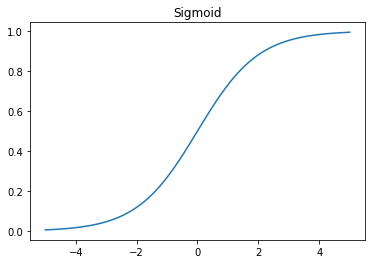

In [11]:
activation = nn.Sigmoid()
out = activation(x)

plt.plot(x.numpy(), out.numpy())
plt.title('Sigmoid')
plt.show()

### Tanh Units
The hyperbolic tangent (tanh) function (used for hidden layer neuron output) is an alternative to Sigmoid function. It is defined by the formula 
$$tanh(x)=\frac{1-e^{-2x}}{1+e^{-2x}}
$$
See the following image, tanh function is similar to Sigmoid function (Mathematically, $(tanh(x)=2\sigma (2x)-1)$), which is also sigmoidal (“S”-shaped). It squashes real-valued number to the range between -1 and 1, i.e., $(tanh(x)\in (-1, 1))$.  Like the Sigmoid units, its activations saturate, but its output is zero-centered (means tanh solves the second drawback of Sigmoid). Therefore, in practice the tanh units is always preferred to the sigmoid units. The derivative of tanh function is defined as $tanh'(x)=1-tanh^{2}(x)$ See the red dotted line in the above image, it interprets that tanh also saturate and kill gradient, since tanh’s derivative has similar shape as compare to Sigmoid’s derivative. What’s more, tanh has stronger gradients, since data is centered around 0, the derivatives are higher, and tanh avoids bias in the gradients.

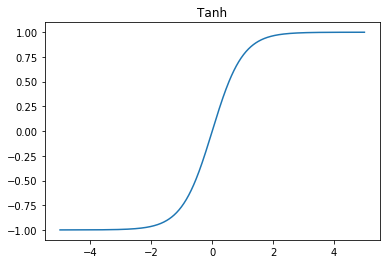

In [12]:
activation = nn.Tanh()
out = activation(x)

plt.plot(x.numpy(), out.numpy())
plt.title('Tanh')
plt.show()

### Rectified Linear Units (ReLU)
In the context of artificial neural networks, the ReLU (used for hidden layer neuron output) is defined as
$$
f(x)=max(0,x)
$$
Where $x$ is the input to a neuron. In other words, the activation is simply thresholded at zero. The range of ReLU is betweem 0 to $(\infty)$. See the image below (red dotted line is the derivative)  The ReLU function is more effectively than the widely used logistic sigmoid and its more practical counterpart, the hyperbolic tangent, since it efficaciously reduce the computation cost as well as some other merits: 1. It was found to greatly accelerate (Krizhevsky et al.) the convergence of stochastic gradient descent compared to the sigmoid/tanh functions. It is argued that this is due to its linear, non-saturating form $(.^{[2]})$ 2. Compared to tanh/sigmoid neurons that involve expensive oeprations (exponentials, etc.), the ReLU can be implemented by simply thresholding a matrix of activations at zero $(.^{[2]})$

Unfortunately, ReLU also suffers several drawbacks, for instance, - ReLU units can be fragile during training and can “die”.

For example, a large gradient flowing through a ReLU neuron could cause the weights to update in such a way that the neuron will never activate on any datapoint again. If this happens, then the gradient flowing through the unit will forever be zero from that point on. That is, the ReLU units can irreversibly die during training since they can get knocked off the data manifold. You may find that as much as 40% of your network can be “dead” (i.e. neurons that never activate across the entire training dataset) if the learning rate is set too high. With a proper setting of the learning rate this is less frequently an issue $(.^{[2]})$ Plus, here is a smooth approximation to the rectifier, which is called the softplus function (see the green line in the above image). It is defined as
$$
f(x)=\ln (1+e^{x})
$$
And its derivative is
$$
f'(x)=\frac{e^{x}}{1+e^{x}}=\frac{1}{1+e^{-x}}
$$
Interestingly, the derivative of Softplus is the logistic function. We can see that both the ReLU and Softplus are largely similar, except near 0 where the softplus is enticingly smooth and differentiable. But it is much easier and efficient to compute ReLU and its derivative than for the softplus function which has $(log(\centerdot))$ and $(exp(\centerdot))$ in its formulation. In deep learning, computing the activation function and its derivative is as frequent as addition and subtraction in arithmetic. By using ReLU, the forward and backward passes are much faster while retaining the non-linear nature of the activation function required for deep neural networks to be useful.

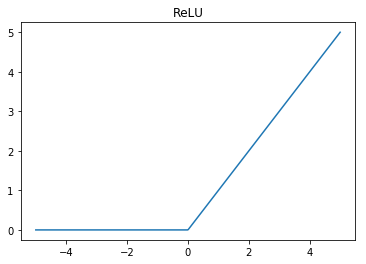

In [13]:
activation = nn.ReLU()
out = activation(x)

plt.plot(x.numpy(), out.numpy())
plt.title('ReLU')
plt.show()

### Leaky and Parametric ReLU
Leaky ReLU is one attempt to fix the “dying ReLU” problem. Instead of the function being zero when $(x<0)$, a leaky ReLU will instead have a small negative slope (of 0.01, or so). That is, the function computes
$$
f(x)=0.01x, (x<0)$$
$$f(x)=x, (x\geq 0)
$$
This form of activation function achieves some success, but the results are not always consistent. The slope in the negative region can also be made into a parameter of each neuron, in this case, it is a Parametric ReLU (introduced in Delving Deep into Rectifiers: Surpassing Human-Level Performance on ImageNet Classification), which take this idea further by making the coefficient of leakage into a parameter that is learned along with the other neural network parameters.$$f(x)=\alpha x, (x<0)$$
$$f(x)=x, (x\geq 0)$$ Where $(\alpha)$ is a small constant (smaller than 1). However, the consistency of the benefit across tasks is presently unclear. Moreover, the formula of Parametric ReLU is equivalent to
$$
f(x)=max(x, \alpha x)
$$
Which has a relation to “maxout” networks.

### Randomized ReLU
Randomized ReLU (RReLU) is a randomized version of Leaky ReLU, where the $(\alpha)$ is a random number. In RReLU, the slopes of negative parts are randomized in a given range in the training, and then fixed in the testing. It is reported that RReLU could reduce overfitting due to its randomized nature in the Kaggle National Data Science Bowl (NDSB) competition. Mathematically, RReLU computes
$$
f(x_{ji})=x_{ji}, if x_{ji} \geq 0
$$
$$
f(x_{ji})=\alpha_{ji}x_{ji}, if x_{ji}<0
$$
Where $(x_{ji})$ denotes the input of $(i)$th channel in $(j)$th example, $(f(x_{ji}))$ denotes the corresponding output after passing the activation function, $(\alpha_{ji}\sim U(l,u), l < u)$ and $(l,u\in[0,1))$. The highlight of RReLU is that in training process, $(\alpha_{ji})$ is a random number sampled from a uniform distribution $(U(l,u))$, while in the test phase, we take average of all the $(\alpha_{ji})$ in training as in the method of dropout, and thus set $(\alpha_{ji})$ to $(\frac{l+u}{2})$ to get a deterministic result (In NDSB, $(\alpha_{ji})$ is sampled from $(U(3,8))$). So in the test time, we have
$$
f(x_{ji})=\frac{x_{ji}}{\frac{l+u}{2}}
$$
Here gives the comparing graph of different ReLUs  For Parametric ReLU, $(\alpha_{i})$ is learned and for Leaky ReLU $(\alpha_{i})$ is fixed. For RReLU, $(\alpha_{ji})$ is a random variable keeps sampling in a given range, and remains fixed in testing. Generally, we summarize the advantages and potential problems of ReLUs: - (+) Biological plausibility: One-sided, compared to the antisymmetry of tanh. - (+) Sparse activation: For example, in a randomly initialized network, only about 50% of hidden units are activated (having a non-zero output). - (+) Efficient gradient propagation: No vanishing or exploding gradient problems. - (+) Efficient computation: Only comparison, addition and multiplication. - (+) Scale-invariant: $(max(0,\alpha x)=\alpha\centerdot max(0,x))$. - (-) Non-differentiable at zero: however it is differentiable anywhere else, including points arbitrarily close to (but not equal to) zero. - (-) Non-zero centered. - (-) Unbounded: Could potentially blow up. - (-) Dying Relu problem: Relu neurons can sometimes be pushed into states in which they become inactive for essentially all inputs. In this state, no gradients flow backward through the neuron, and so the neuron becomes stuck in a perpetually inactive state and “dies.” In some cases, large numbers of neurons in a network can become stuck in dead states, effectively decreasing the model capacity. This problem typically arises when the learning rate is set too high.

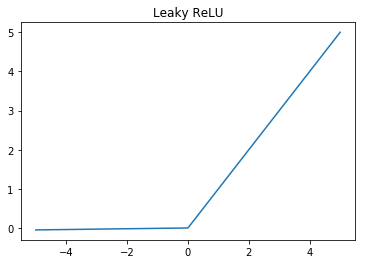

In [14]:
activation = nn.LeakyReLU()
out = activation(x)

plt.plot(x.numpy(), out.numpy())
plt.title('Leaky ReLU')
plt.show()

### Maxout
Some other types of units that do not have the functional form $(f(w^{T}x+b))$ where a non-linearity is applied on the dot product between the weights and the data. One relatively popular choice is the Maxout neuron that generalizes the ReLU and its leaky version. The Maxout neuron computes the function

$$
max(w^{T}_{1}+b_{1},w^{T}_{2}+b_{2})
$$

Notice that both ReLU and Leaky ReLU are a special case of this form (for example, for ReLU we have $(w_{1},b_{1}=0)$). The Maxout neuron therefore enjoys all the benefits of a ReLU unit (linear regime of operation, no saturation) and does not have its drawbacks (dying ReLU). However, unlike the ReLU neurons it doubles the number of parameters for every single neuron, leading to a high total number of parameters.

### Softmax
The Softmax function (Used for multi-classification neural network output), or normalized exponential function, in mathematics, is a generalization of the logistic function that “squashes” a $(K)$-dimensional vector $(\mathbf{z})$ from arbitrary real values to a $(K)$-dimensional vector $(\sigma (\mathbf{z}))$ of real values in the range $([0,1])$ that add up to 1. The function is given by
$$
\sigma (\mathbf{z})_{j}=\frac{e^{z_{j}}}{\sum_{k=1}^{K}e^{z_{k}}}, j=1, 2, \dots, K
$$
In probability theory, the output of the Softmax function can be used to represent a categorical distribution, that is, a probability distribution over $(K)$ different possible outcomes. In fact, it is the gradient-log-normalizer of the categorical probability distribution. Here is an example of Softmax application 
<img src="images/softmax_ac.png"/>
The softmax function is used in various multiclass classification methods, such as multinomial logistic regression, multiclass linear discriminant analysis, naive Bayes classifiers, and artificial neural networks. Specifically, in multinomial logistic regression and linear discriminant analysis, the input to the function is the result of K distinct linear functions, and the predicted probability for the \(j\)th class given a sample vector $(\mathbf{x})$ and a weighting vector $(\mathbf{w})$ is

$$
P(y=j|\mathbf{x})=\frac{e^{x^{T}w_{j}}}{\sum_{k=1}^{K}e^{x^{T}w_{k}}}
$$

This can be seen as the composition of $(K)$ linear functions $(\mathbf{x}\mapsto x^{T}w_{1},\dots ,\mathbf{x}\mapsto x^{T}w_{K})$ and the softmax function (where $(x^{T}w)$ denotes the inner product of $(\mathbf{x})$ and $(\mathbf{w}))$. The operation is equivalent to applying a linear operator defined by $(\mathbf{w})$ to vectors $(\mathbf{x})$, thus transforming the original, probably highly-dimensional, input to vectors in a $(K)$-dimensional space $(R^{K})$. 

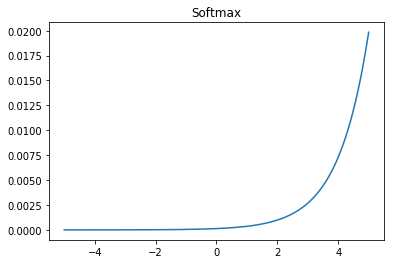

In [16]:
activation = nn.Softmax(dim=0)
out = activation(x)

plt.plot(x.numpy(), out.numpy())
plt.title('Softmax')
plt.show()